In [1]:
import pandas as pd
import numpy as np
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##read data
data = pd.read_json('data/transactions.json', lines=True)

In [3]:
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


The data has 786363 data points with 29 columns. There are 'int'. 'float', 'object', 'bool' types data as showing below. Noticing that missing values awre blank, I replaced them with 'np.nan' below as well, so that we could calculate missing portion later.

In [4]:
data.shape

(786363, 29)

In [5]:
data.dtypes

accountNumber                 int64
customerId                    int64
creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType              object
echoBuffer                   object
currentBalance              float64
merchantCity                 object
merchantState                object
merchantZip                  object
cardPresent                    bool
posOnPremises                object
recurringAuthInd             object
expirationDateKeyInMatch    

In [6]:
##replace blacnk with np.nan
data = data.replace(r'', np.NaN)

In [7]:
data.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

Basic statistics are showing as below, we can see each feature's min and max as well as mean and std with quatile information. And more important, we want to know the distribution in each class 'Fraud" and "Normal, it is showing as below as well.

In [8]:
##basic statistics about data
data.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,0.0,786363.000000,0.0,0.0,0.0,0.0,0.0
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,NaN,4508.739089,NaN,NaN,NaN,NaN,NaN
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,NaN,6457.442068,NaN,NaN,NaN,NaN,NaN
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,NaN,689.910000,NaN,NaN,NaN,NaN,NaN
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,NaN,2451.760000,NaN,NaN,NaN,NaN,NaN
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,NaN,5291.095000,NaN,NaN,NaN,NaN,NaN
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,NaN,47498.810000,NaN,NaN,NaN,NaN,NaN


In [9]:
##class statistics characteristics
data.groupby('isFraud').mean()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
isFraud,,,,,,,,,,,,,,,,,
False,5.373624e+08,5.373624e+08,10754.884062,6252.455386,135.570249,544.180723,543.897110,4757.081613,NaN,4502.428675,NaN,NaN,NaN,0.451469,NaN,NaN,0.001331
True,5.291445e+08,5.291445e+08,11044.958525,6142.894186,225.215905,562.331884,562.056616,4778.372151,NaN,4902.064338,NaN,NaN,NaN,0.278248,NaN,NaN,0.001047


General insepction find: transaction mount fraud is lower than normal on average; cardPresent is higher in fraud.

In [10]:
#customerID is same with accountNumber, remove it
data = data.drop(['customerId'], axis=1)
#encode CVV remove original two columns
data['CVVmatch'] = (data['cardCVV'] == data['enteredCVV'])
data = data.drop(['cardCVV'], axis=1)
data = data.drop(['enteredCVV'], axis=1)

Check categorical data unique values:

In [11]:
##categorical data investigate
data['transactionType'].value_counts()

PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: transactionType, dtype: int64

In [12]:
data['acqCountry'].value_counts()

US     774709
MEX      3130
CAN      2424
PR       1538
Name: acqCountry, dtype: int64

In [13]:
data['merchantCountryCode'].value_counts()

US     778511
MEX      3143
CAN      2426
PR       1559
Name: merchantCountryCode, dtype: int64

In [14]:
data['merchantCategoryCode'].value_counts()

online_retail           202156
fastfood                112138
entertainment            80098
food                     75490
online_gifts             66238
rideshare                51136
hotels                   34097
fuel                     23910
subscriptions            22901
auto                     21651
health                   19092
personal care            18964
airline                  15412
mobileapps               14990
online_subscriptions     11067
furniture                 7432
food_delivery             6000
gym                       2209
cable/phone               1382
Name: merchantCategoryCode, dtype: int64

In [15]:
data['posEntryMode'].value_counts()

05    315035
09    236481
02    195934
90     19576
80     15283
Name: posEntryMode, dtype: int64

In [16]:
data['posConditionCode'].value_counts()

01    628787
08    149634
99      7533
Name: posConditionCode, dtype: int64

In [17]:
data['merchantName'].value_counts()

Uber                        25613
Lyft                        25523
oldnavy.com                 16992
staples.com                 16980
alibaba.com                 16959
                            ...  
Golds Gym #956354               2
Boost Mobile #104815            2
TMobile Wireless #602341        1
EZ Wireless #149871             1
Curves #849125                  1
Name: merchantName, Length: 2490, dtype: int64

#### Finding: 'merchantName should get special treatment as it has 2000 different values, onehot-encoder should not be used here as it will create too many feature columns and affect the model performance.

In [18]:
#get rid of the merchant name '#...' part
data['merchantName'] = data['merchantName'].apply(lambda x: x.partition('#')[0].strip())
##change transaction time to 'datetime'
data['transactionDateTime'] = pd.to_datetime(data['transactionDateTime'])

In [19]:
##investigate the missing values
print('data dimensions:',data.shape)
perc_missing_per_ftr = data.isnull().sum(axis=0)/data.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(data[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)

data dimensions: (786363, 27)
fraction of missing values in features:
acqCountry             0.005801
merchantCountryCode    0.000921
posEntryMode           0.005155
posConditionCode       0.000520
transactionType        0.000888
echoBuffer             1.000000
merchantCity           1.000000
merchantState          1.000000
merchantZip            1.000000
posOnPremises          1.000000
recurringAuthInd       1.000000
dtype: float64
data types of the features with missing values:
acqCountry              object
merchantCountryCode     object
posEntryMode            object
posConditionCode        object
transactionType         object
echoBuffer             float64
merchantCity           float64
merchantState          float64
merchantZip            float64
posOnPremises          float64
recurringAuthInd       float64
dtype: object


Notice that missing data are all blank, replace them with NaN, and give all the missing data portion in each category as well as the portion of data containing any missing features. From the result above, it draws to the conclusion that echoBuffer', 'merchantCity', 'merchantState', 'merchantZip','posOnPremises', 'recurringAuthInd' features does not contain any valid data, we can remove them from our dataset.Also I removed 'dateOfLastAddressChange' as it may contributes little to the prediction result. But if later there are more time, I can further investigate how to use that feature

In [20]:
col_drops = ['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip','posOnPremises', 'recurringAuthInd', 'dateOfLastAddressChange']
data = data.drop(col_drops, axis=1)

In [21]:
#after removed black columns, check missing data point portion
frac_missing = sum(data.isnull().sum(axis=1)!=0)/data.shape[0]
print('fraction of points with missing values:',frac_missing)

fraction of points with missing values: 0.012328911711258033


In [22]:
#parse transactioni time to month, day, hour, and notice that all data are from 2016 year.
data['month'] = data['transactionDateTime'].apply(lambda x: x.month)
data['day_of_month'] = data['transactionDateTime'].apply(lambda x: x.day)
data['hour_of_day'] = data['transactionDateTime'].apply(lambda x: x.hour)

### EDA

In [23]:
## Fraud portion imbalanced data
Fraud = data[data['isFraud'] == True]
Normal = data[data['isFraud'] == False]
print('The total data point is', data.shape[0])
print('Fraud data point is', Fraud.shape[0])
print("Valid data point is", Normal.shape[0])
print("The fraud portion is", Fraud.shape[0]/data.shape[0])

The total data point is 786363
Fraud data point is 12417
Valid data point is 773946
The fraud portion is 0.01579041740264992


This is a highly imbalanced data, for future implement, the first thing to do is dealing with imbalance.

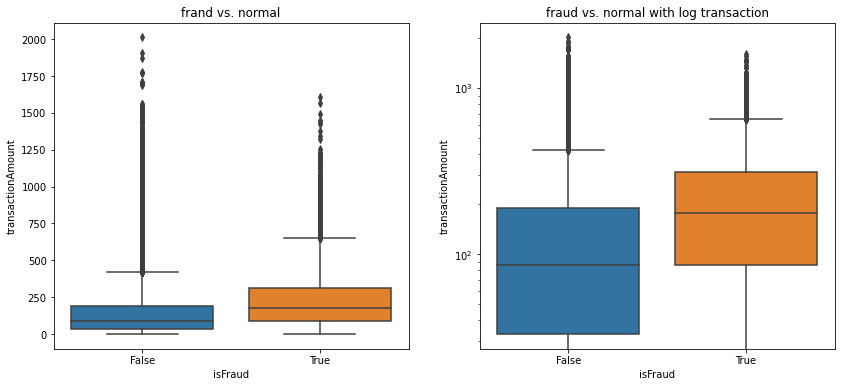

In [24]:
#boxplot of fraud vs. normal data
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))
sns.boxplot(x="isFraud", y='transactionAmount', data=data, ax = ax1).set_title("frand vs. normal")
sns.boxplot(x="isFraud", y='transactionAmount', data=data, ax = ax2).set_title("fraud vs. normal with log transaction")
ax2.set(yscale="log")
plt.show()

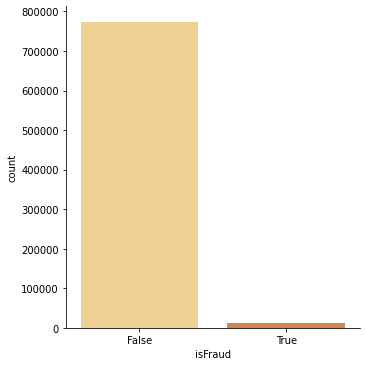

In [25]:
ax = sns.catplot(x = "isFraud", kind = "count", data = data, alpha=0.8, palette = 'YlOrBr')
plt.show()

### Fraud and Normal transaction amount distribution comparison
conclusion: In the smaller amount range, normal transactions tend to happen more often, while when amount becomes bigger, fraud tends to happen more frequent then normal transaction.(from the green area above blue)

C:\Users\huayu\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\huayu\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


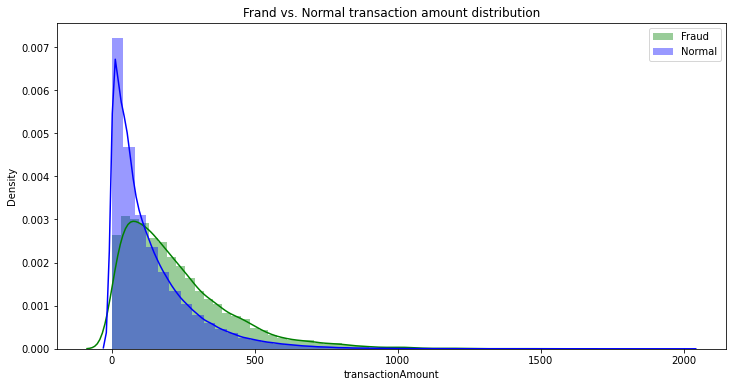

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(Fraud['transactionAmount'], label = 'Fraud', color="g")
sns.distplot(Normal['transactionAmount'], label = 'Normal', color = 'b')
plt.title("Frand vs. Normal transaction amount distribution")
plt.legend()
plt.show()

### check seasonality

From the result figures we can see there is no apparent seasonality. The fraud amount does not change with a pattern no matter with month, day of the month or hour of the day.These columns will be removed later.

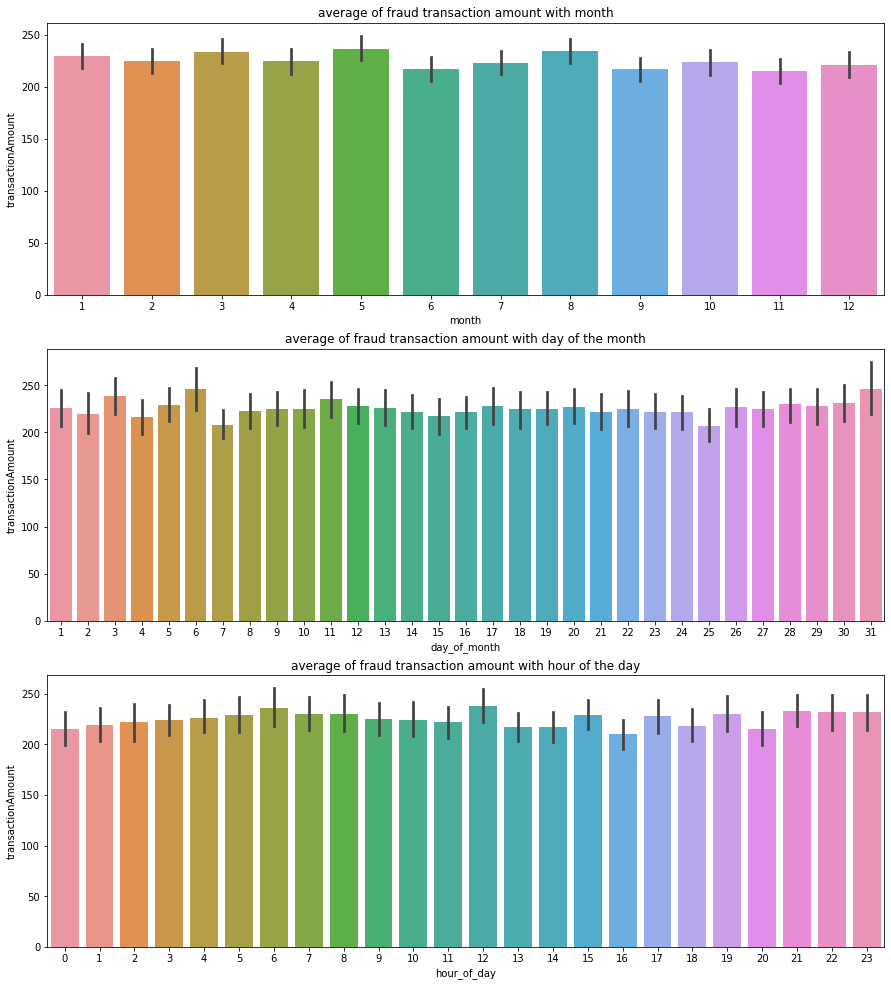

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (15, 17))
sns.barplot(x = 'month', y = 'transactionAmount', data = Fraud, ax = ax1).set_title("average of fraud transaction amount with month")
sns.barplot(x = 'day_of_month', y = 'transactionAmount', data = Fraud, ax = ax2).set_title("average of fraud transaction amount with day of the month")
sns.barplot(x = 'hour_of_day', y = 'transactionAmount', data = Fraud, ax = ax3).set_title('average of fraud transaction amount with hour of the day')
plt.show()

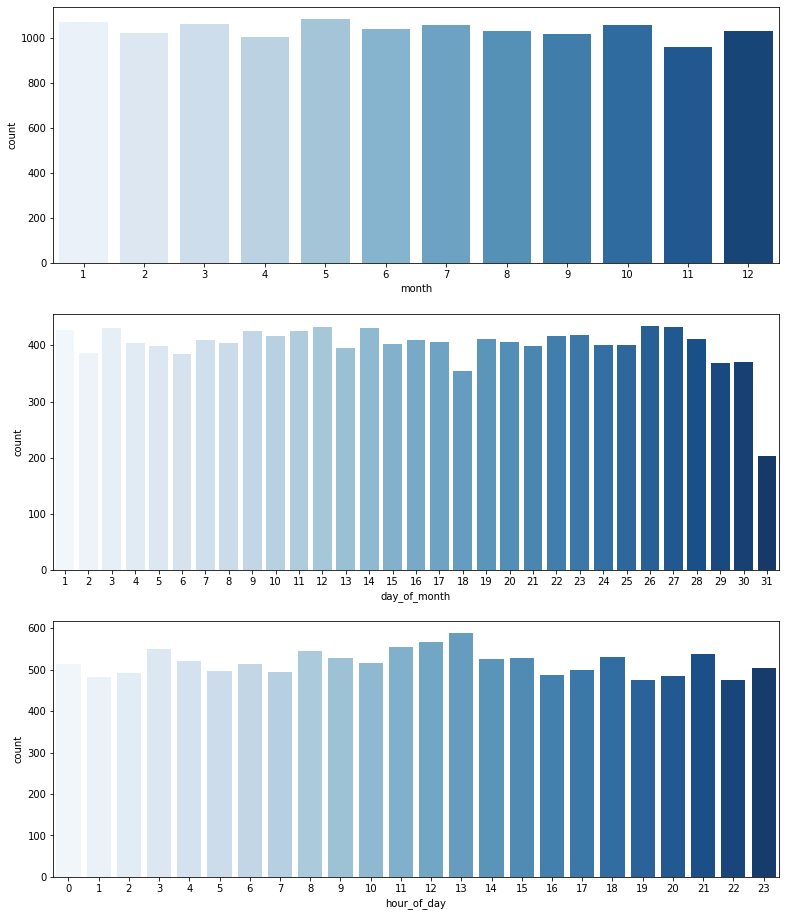

In [28]:
#fig, ax = plt(figsize= (20, 8))
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (13, 16))
sns.countplot(x="month",data = Fraud,  palette="Blues", ax = ax1)
sns.countplot(x="day_of_month",data = Fraud,  palette="Blues", ax = ax2)
sns.countplot(x="hour_of_day",data = Fraud,  palette="Blues", ax = ax3)
plt.show()

In [29]:
col_drops = ['month', 'day_of_month', 'hour_of_day', 'currentExpDate', 'accountOpenDate']
data = data.drop(col_drops, axis=1)

### check how merchant category influence fraud 
merchant catergory with fraud transaction amount compare to normal transactions.
conlusion: some merchant category appear more fraud transaction than others. "health", "online_gifts", "online_retail", "rideshare". "subscriptions" those categories apparently have more average transaction amount of money in fraud than in normal. There are also "entertainment", "fastfood", "auto", "personal care", "food", "hotels", "airline", "furniture" also have more fraud average amount of money than normal. Though, in categories "mobileapps", "food_delivery", "gym", "fuel", "online_subscriptions", "cable/phone" arely have fraud compared to the normal amount of money spent on them.

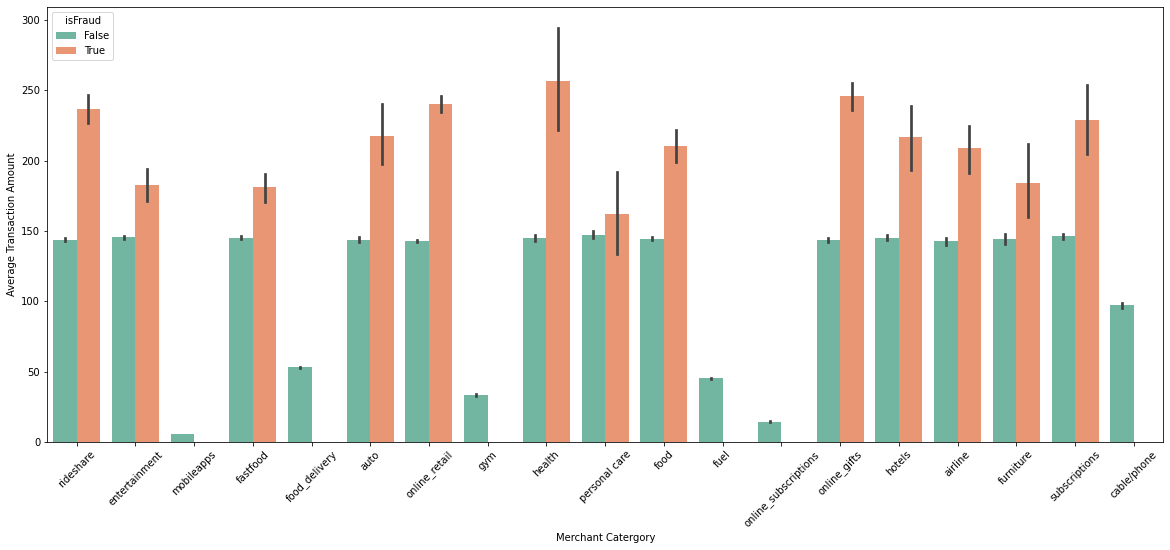

In [30]:
fig, ax = plt.subplots(figsize= (20, 8))
ax = sns.barplot(x = 'merchantCategoryCode', y = 'transactionAmount', hue = 'isFraud', data = data, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45, fontsize=10)
#ax.set_xticklabels(rotation= 'vertical')
#plt.xticks(rotation=45)
plt.xlabel('Merchant Catergory')
plt.ylabel('Average Transaction Amount')
plt.show()

#### merchant category apparently influenced fraud amount, attention should be draw on merchant related features.
conclusion: online transaction type has most fraud cases.

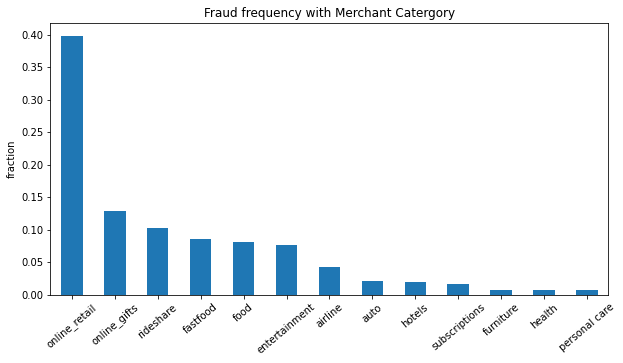

In [31]:
pd.value_counts(Fraud['merchantCategoryCode'], normalize = True).plot.bar(figsize = (10, 5))
plt.ylabel('fraction')
plt.xticks(rotation=40)
plt.title('Fraud frequency with Merchant Catergory')
plt.show()

### Does card present influence fraud number?
conclusion: when card id not present, there tend to be more fraud.

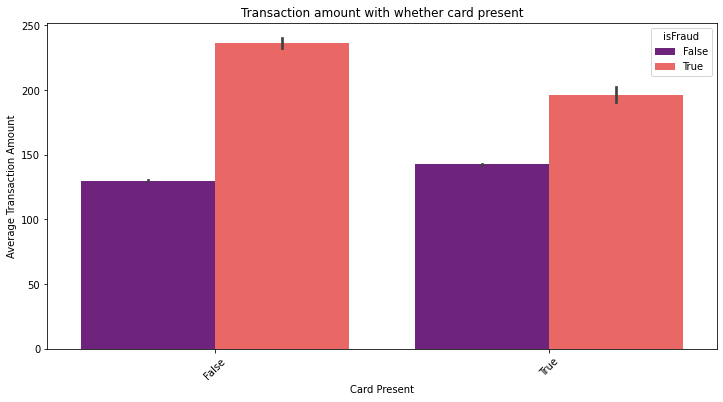

In [32]:
fig, ax = plt.subplots(figsize= (12, 6))
ax = sns.barplot(x = 'cardPresent', y = 'transactionAmount', hue = 'isFraud', data = data, palette="magma", saturation = 0.9)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45, fontsize=10)
plt.title('Transaction amount with whether card present')
plt.xlabel('Card Present')
plt.ylabel('Average Transaction Amount')
plt.show()

### Does posEntryMode affect fraud?
conclusion: yes, for "05" type, there is less fraud happen compare to other types, and all types have more average transaction amount in fraud than normal.

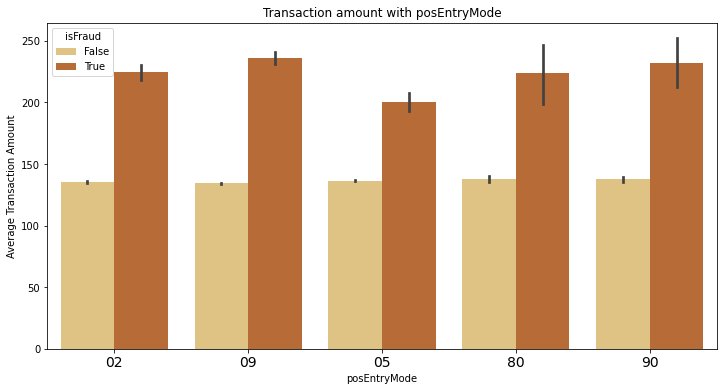

In [33]:
fig, ax = plt.subplots(figsize= (12, 6))
ax = sns.barplot(x = 'posEntryMode', y = 'transactionAmount', hue = 'isFraud', data = data, palette="YlOrBr", saturation = 0.6)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
plt.title('Transaction amount with posEntryMode')
plt.xlabel('posEntryMode')
plt.ylabel('Average Transaction Amount')
plt.show()

### Does acqCountry affect fraud?

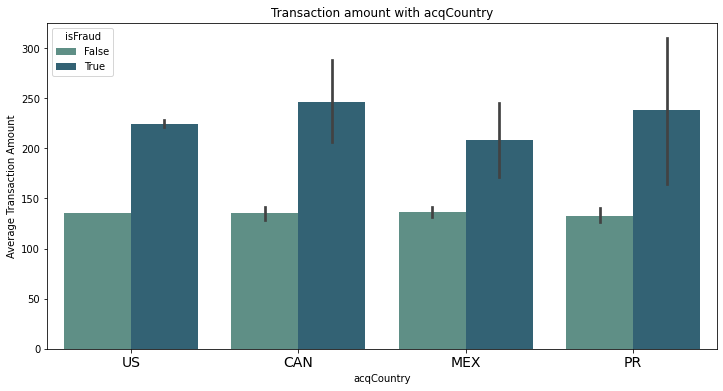

In [34]:
fig, ax = plt.subplots(figsize= (12, 6))
ax = sns.barplot(x = 'acqCountry', y = 'transactionAmount', hue = 'isFraud', data = data, palette="crest", saturation = 0.6)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
plt.title('Transaction amount with acqCountry')
plt.xlabel('acqCountry')
plt.ylabel('Average Transaction Amount')
plt.show()

### Does merchantCountryCode affect fraud?

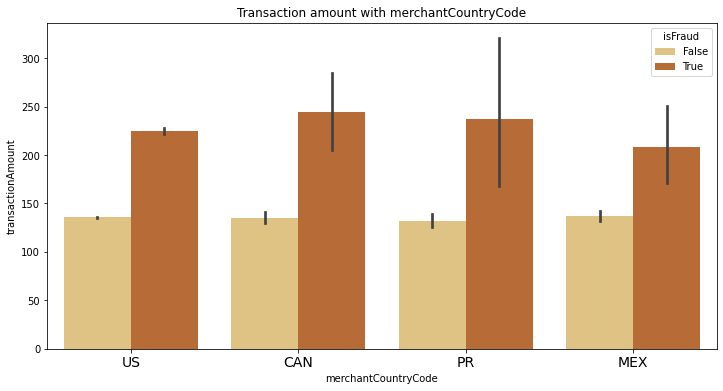

In [35]:
fig, ax = plt.subplots(figsize= (12, 6))
ax = sns.barplot(x = 'merchantCountryCode', y = 'transactionAmount', hue = 'isFraud', data = data, palette="YlOrBr", saturation = 0.6)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
plt.title('Transaction amount with merchantCountryCode')
# plt.xlabel('posEntryMode')
# plt.ylabel('Average Transaction Amount')
plt.show()

### Does posConditionCode affect fraud?

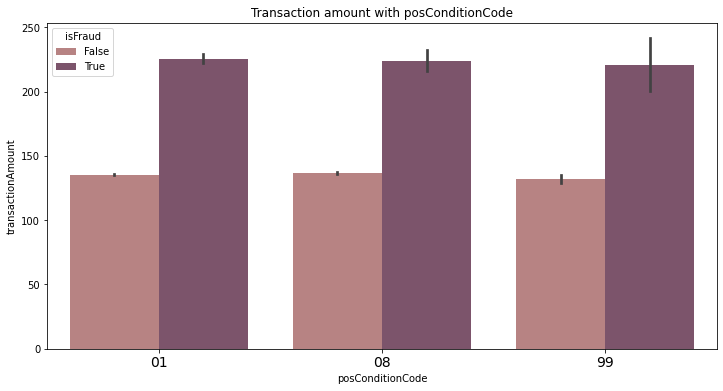

In [36]:
fig, ax = plt.subplots(figsize= (12, 6))
ax = sns.barplot(x = 'posConditionCode', y = 'transactionAmount', hue = 'isFraud', data = data, palette="flare", saturation = 0.4)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
plt.title('Transaction amount with posConditionCode')

plt.show()

### Doess CVVmatch and Expiration date match affect fraud ?
conslusion:When expiration date does not macth, there tends to be more fraud. From the figures we can see when expiration matches, the fraud amount is less than normal transaction. While CVVmatch surplrisingly does not influence the fraud that much.

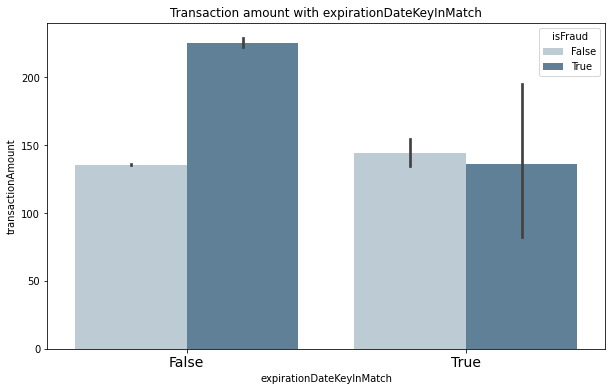

In [37]:
fig, ax = plt.subplots(figsize= (10, 6))
sns.barplot(x = 'expirationDateKeyInMatch', y = 'transactionAmount', hue = 'isFraud', data = data, 
                 palette="Blues", saturation = 0.4)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
plt.title('Transaction amount with expirationDateKeyInMatch')
plt.show()

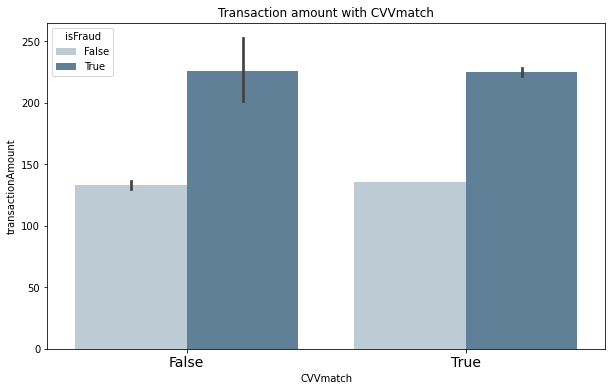

In [38]:
fig, ax = plt.subplots(figsize= (10, 6))
ax = sns.barplot(x = 'CVVmatch', y = 'transactionAmount', hue = 'isFraud', data = data, palette="Blues", saturation = 0.4)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
plt.title('Transaction amount with CVVmatch')
plt.show()

## feature engineering
Citation paper: Bhattacharyya, S., Jha, S., Tharakunnel, K., & Westland, J. C. (2011). Data mining for credit card fraud: A comparative study. Decision support systems, 50(3), 602-613.


### feature1 &2 are customer-based features
feature1 -- 
average spend per day over the past 30 days before this transaction with a credit card.
sum up all the transaction beloongs to this card during the past 30 days prior to the transaction 
then divided by 30 (the beginning just divided the days amount being summer up) \
feature2 --
Count 30 days before the transaction date how many transaction this card has on average.

In [39]:
##feature1
data_copy = data
data_copy = data_copy.set_index('transactionDateTime')
_group = data_copy.groupby('accountNumber').rolling('30d').transactionAmount.mean()
amount30_day = pd.DataFrame(_group)
amount30_day1 = amount30_day.rename(columns={"transactionAmount":"AverageAmount_30days"})
amount30_day1 = amount30_day1.reset_index()
amount30_day1 = amount30_day1.sort_values(by=['accountNumber', 'transactionDateTime'])
data_copy = data_copy.reset_index()
data_copy = data_copy.sort_values(by=['accountNumber', 'transactionDateTime'], ignore_index = True)
data1 = pd.concat([data_copy, amount30_day1['AverageAmount_30days']], axis = 1)

In [40]:
###feature2 --- transaction number per account every 30 days
data_copy = data1
data_copy = data_copy.set_index('transactionDateTime')
_group = data_copy.groupby('accountNumber').rolling('30d').transactionAmount.count()
amount30_day = pd.DataFrame(_group)
amount30_day2 = amount30_day.rename(columns={"transactionAmount":"Count30days"})
amount30_day2 = amount30_day2.reset_index()
data_copy = data_copy.reset_index()
data_copy = data_copy.sort_values(by=['accountNumber', 'transactionDateTime'], ignore_index = True)
data1 = pd.concat([data_copy, amount30_day2['Count30days']], axis = 1)

### feature3&4 are based on both account and merchant category
feature3 -- amount od same merchant type over 30 days. Calculate past 30 days up to a transaction average amount on same merchant category with the credit card. \
feature4 -- number of same merchant type over 30 days.Total number transactions with the same merchant over a period of 30 days before a given transaction.

In [41]:
#feature3
data_copy = data1
data_copy = data_copy.set_index('transactionDateTime')
_group = data_copy.groupby(['accountNumber', 'merchantCategoryCode']).rolling('30d').transactionAmount.mean()
amountMerchant = pd.DataFrame(_group)
amountMerchant = amountMerchant.rename(columns={"transactionAmount":"AmountMerhant30days"})
amountMerchant = amountMerchant.reset_index()
data_copy = data_copy.reset_index()
data_copy = data_copy.sort_values(by=['accountNumber', 'transactionDateTime'], ignore_index = True)
data1 = pd.concat([data_copy, amountMerchant['AmountMerhant30days']], axis = 1)

In [42]:
###feature4
data_copy = data1
data_copy = data_copy.set_index('transactionDateTime')
_group = data_copy.groupby(['accountNumber', 'merchantCategoryCode']).rolling('30d').transactionAmount.count()
NumberMerchantType = pd.DataFrame(_group)
NumberMerchantType = NumberMerchantType.rename(columns={"transactionAmount":"NumberMerhantType30days"})
NumberMerchantType = NumberMerchantType.reset_index()
data_copy = data_copy.reset_index()
data_copy = data_copy.sort_values(by=['accountNumber', 'transactionDateTime'], ignore_index = True)
data1 = pd.concat([data_copy, NumberMerchantType['NumberMerhantType30days']], axis = 1)

### feature5&6 merchant name and account based features

feature 5 -- amount same merchant, average amount per day spent over a 30 days period on all transactions up to this one with a card.\
feature 6 -- number same merchant, average count number per day spent over a 30 days period on all transactions up to this one with a card.

In [43]:
###feature5
data_copy = data1
data_copy = data_copy.set_index('transactionDateTime')
_group = data_copy.groupby(['accountNumber', 'merchantName']).rolling('30d').transactionAmount.mean()
AmountMerchantName = pd.DataFrame(_group)
AmountMerchantName = AmountMerchantName.rename(columns={"transactionAmount":"AmountMerhantName30days"})
AmountMerchantName = AmountMerchantName.reset_index()
data_copy = data_copy.reset_index()
data_copy = data_copy.sort_values(by=['accountNumber', 'transactionDateTime'], ignore_index = True)
data1 = pd.concat([data_copy, AmountMerchantName['AmountMerhantName30days']], axis = 1)


In [44]:
###feature6
data_copy = data1
data_copy = data_copy.set_index('transactionDateTime')
_group = data_copy.groupby(['accountNumber', 'merchantName']).rolling('30d').transactionAmount.count()
NumberMerchantName = pd.DataFrame(_group)
NumberMerchantName = NumberMerchantName.rename(columns={"transactionAmount":"NumberMerhantName30days"})
NumberMerchantName = NumberMerchantName.reset_index()
data_copy = data_copy.reset_index()
data_copy = data_copy.sort_values(by=['accountNumber', 'transactionDateTime'], ignore_index = True)
data1 = pd.concat([data_copy, NumberMerchantName['NumberMerhantName30days']], axis = 1)

In [45]:
data1['AmountMerhant30days'] = data1['AmountMerhant30days'].apply(lambda x: np.round(x,2))
data1['AmountMerhantName30days'] = data1['AmountMerhantName30days'].apply(lambda x: np.round(x,2))

### available money portion on the account 

In [46]:
###feature7
data1['MoneyAvailable_Percent'] = np.round((1 - data1['currentBalance']/data1['creditLimit']), 2)

## reversal

In [47]:
ReversalAmount = data1[data1['transactionType'] == 'REVERSAL'].transactionAmount.sum()
print("The total reversal type transaction amount is", ReversalAmount)
ReversalNumber = data1[data1['transactionType'] == 'REVERSAL'].shape[0]
print("The total number transaction on reversal type is", ReversalNumber)

The total reversal type transaction amount is 2821792.5
The total number transaction on reversal type is 20303


## Multi-swipe detection

### method 1: define duplicate as same account number, same transaction amount, merchant name, merchant country code, merchant category caode.

In [48]:
df_new= data
##define same account number, transaction amount with same merchant name in a certain period of time (for example 5mins) 
###can be multi-swipe. Find the earlest time of same account, mount and merchant transaction group.
idx = df_new.groupby(['accountNumber', 'transactionAmount','merchantName', 'merchantCountryCode', 'merchantCategoryCode'])['transactionDateTime'].idxmin()
df_new1 = df_new.loc[idx]
df_new1 = df_new1[['accountNumber','transactionAmount', 'merchantName', 'transactionDateTime', 'merchantCountryCode', 'merchantCategoryCode']]
df_merge = pd.merge(df_new, df_new1, on = ["accountNumber", "transactionAmount", "merchantName", 'merchantCountryCode', 'merchantCategoryCode'], how = 'left')
df_merge['time'] = df_merge['transactionDateTime_x']- df_merge['transactionDateTime_y']
df_merge['time_in_s'] = df_merge['time'].apply(lambda x: x.seconds)
num_multi = df_merge[(df_merge['time_in_s'] > 0) & (df_merge['time_in_s'] < 300)]
print("The multi-swipe number is", num_multi.shape[0])
multi_amount = num_multi['transactionAmount'].sum()
print("The multi-swipe transaction amount is", multi_amount)

The multi-swipe number is 13321
The multi-swipe transaction amount is 1932444.31


## feature relations and correlation matrix

In [49]:
num_features = ['accountNumber','creditLimit', 'availableMoney', 'transactionAmount', 'cardLast4Digits','currentBalance', 
               'AverageAmount_30days', 'Count30days','AmountMerhant30days', 'NumberMerhantType30days','AmountMerhantName30days',
               'NumberMerhantName30days','MoneyAvailable_Percent' ]

In [50]:
cat_features = ['merchantName','acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 
               'transactionType','cardPresent', 'expirationDateKeyInMatch', 'CVVmatch']

In [51]:
print('Categotical features:', len(cat_features))
print('Numerical features:', len(num_features))

Categotical features: 10
Numerical features: 13


In [52]:
data = data1
### change all boolean type to 1/0
data['isFraud']=data['isFraud'].astype('int')
data['cardPresent']=data['cardPresent'].astype('int')
data['expirationDateKeyInMatch']=data['expirationDateKeyInMatch'].astype('int')
data['CVVmatch']=data['CVVmatch'].astype('int')

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_num = pd.DataFrame(scaler.fit_transform(data[num_features]), columns = num_features)

### Correlation matrix

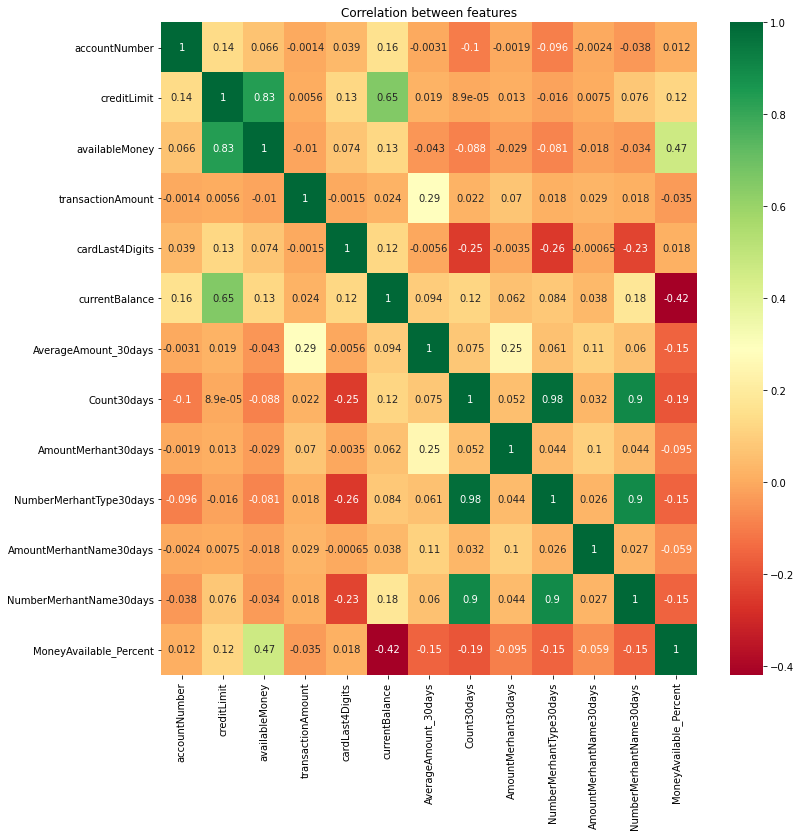

In [54]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corr_map = data_num.corr()
top_corr_features = corr_map.index
plt.figure(figsize=(12,12))
plt.title('Correlation between features')
#plot heat map of correlation
g=sns.heatmap(data_num.corr(),annot=True, cmap="RdYlGn")

From the correlation matrix, we can see there are some feature are highly correlated, such as "Count30days" with "NumberMerchantName30days" and "NumberMerchantName30days", also the "available money" is hightly correlated with "credit limit".

## Implement model

In [55]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import preprocessing
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from xgboost import plot_importance


In [56]:
print('data dimensions:',data.shape)
perc_missing_per_ftr = data.isnull().sum(axis=0)/data.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(data[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)

frac_missing = sum(data.isnull().sum(axis=1)!=0)/data.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (786363, 25)
fraction of missing values in features:
acqCountry             0.005801
merchantCountryCode    0.000921
posEntryMode           0.005155
posConditionCode       0.000520
transactionType        0.000888
dtype: float64
data types of the features with missing values:
acqCountry             object
merchantCountryCode    object
posEntryMode           object
posConditionCode       object
transactionType        object
dtype: object
fraction of points with missing values: 0.012328911711258033


### XGBoost model

In [57]:
num_features = ['accountNumber','creditLimit', 'availableMoney', 'transactionAmount', 'cardLast4Digits','currentBalance', 
               'AverageAmount_30days', 'Count30days','AmountMerhant30days', 'NumberMerhantType30days','AmountMerhantName30days',
               'NumberMerhantName30days','MoneyAvailable_Percent' ]
print("Numerical feature:", len(num_features))

Numerical feature: 13


In [58]:
cat_features = ['acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 
               'transactionType','cardPresent', 'expirationDateKeyInMatch', 'CVVmatch']

In [59]:
le_features = ['merchantName']
print("Categorical feature:", len(cat_features)+len(le_features))

Categorical feature: 10


In [60]:
#drop time column
data = data.drop(['transactionDateTime'], axis = 1)

In [61]:
X = data.iloc[:,data.columns != 'isFraud']
y = data['isFraud']

In [62]:
# one-hot encoder
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
label_transformer = Pipeline(steps = [
    ('label', OrdinalEncoder())
])
# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features),
    ('merchant', label_transformer,le_features)
    ])

In [63]:
X_prep = preprocessor.fit_transform(X)
#collect feature names
feature_names = preprocessor.transformers_[0][-1] + \
            list(preprocessor.named_transformers_['cat'][0].get_feature_names(cat_features)) +\
                 preprocessor.transformers_[2][-1]


For saving memory, I save prepared data with onehot encoder into a cvs file for next time using, does not need to run from the beginning.

In [64]:
### save the prepared data later for other models
# prep_data = pd.concat([X_prep, pd.DataFrame(y)], axis = 1)
# prep_data.to_csv('data_prepared.csv')

### XGBoost
XGBoost handles imbalanced data with "scale_pos_weight" parameter for assign different wegihts. Generally, assign it as ratio of negative class to positive class, though here is not the case.
summary of XGBoost model:
I have tried parameter tuning with "scale_pos_weight", the best number is 2.9 with accuracy around 98.53% and f1 score 0.271.
XGBoost advantages -- XGBoost can deal with missing data withouth preprocessing and choose the best method for imputation.

In [113]:
#train-test split
random_state = 42
X_train, X_test,y_train, y_test = train_test_split(X_prep, y, stratify= y, test_size = 0.3, random_state = random_state)
#X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size = 0.33, random_state = random_state, stratify=y_other)

In [114]:
xgb = XGBClassifier(scale_pos_weight = 2.9, 
                    seed = 42, 
                    learning_rate = 0.4, 
                    reg_alpha = 0.1,
                    n_estimators = 400,
                    feature_names = feature_names,
                    max_depth = 8
                   )
xgb.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              feature_names=['accountNumber', 'creditLimit', 'availableMoney',
                             'transactionAmount', 'cardLast4Digits',
                             'currentBalance', 'AverageAmount_30days',
                             'Count30days', 'AmountMerhant30days',
                             'NumberMerhantType30days',
                             'AmountMerhantName30days',
                             'NumberMerhantName30da...
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints=None, learning_rate=0.4, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=400, n_jobs=0,
              num_parallel_tree=1, random_state=42, reg_alpha=0.1, reg_lambda=1,
              scale_pos_weight=2.9, seed=42, subsample=1, tree_method=None,
   

In [115]:
y_pred = xgb.predict(X_test)

In [116]:
print("F1 score for XGBoost model is", f1_score(y_test, y_pred))
print("Accuracy score for XGBoost model is", accuracy_score(y_test, y_pred))

F1 score for XGBoost model is 0.2669584245076586
Accuracy score for XGBoost model is 0.985799609171333


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

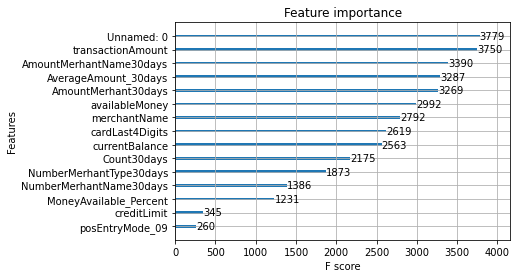

In [120]:
from xgboost import plot_importance
plot_importance(xgb, max_num_features = 15)

The feature being created play a huge part in deciding whethere a transaction is fraud or not, as many of them appeared the most important 15 features. such as "AmountMerhant30days", " AmountMerhantName30days", "Count30days", "NumberMerhantType30days", "AmountMerhantName30days". And also, "merchantName" and " posEntryMode" is important for prediction as well, more feature engineering towards this feature, may boost the model performance.

### XGB with gridsearch (did not use)
#### (due to the limitation of computing resources, this method does not give a good result)


In [121]:
data = pd.read_csv('data_prepared.csv')
X_prep = data.iloc[:, data.columns != 'isFraud']
y = data['isFraud']

MemoryError: Unable to allocate 6.00 MiB for an array with shape (786363,) and data type float64

In [ ]:
X_other1, X_test1, y_other1, y_test1 = train_test_split(X_prep, y, stratify= y, test_size = 0.3, random_state = 42)

param_grid = {
    'xgbclassifier__scale_pos_weight':[1, 2, 3],
#    'xgbclassifier__nthread':[2, 3],
 #   'xgbclassifier__max_depth':[2, 4],
 #   'xgbclassifier__booster': ['gbtree','dart'],
 #   'xgbclassifier__max_delta_step':[1, 3, 5]
}
xgb_grid = XGBClassifier(seed = 42)


In [ ]:
grid = GridSearchCV(xgb_grid, param_grid=param_grid, scoring='f1',
                        cv=3, return_train_score = True, n_jobs=-1, verbose=True)

grid.fit(X_other1, y_other1)

In [ ]:
pd.DataFrame(grid.cv_results_)

In [ ]:
print('best model parameters:',grid.best_params_)
print('validation score:',grid.best_score_) 

### Difficulties in gridseachCV method in XGBoost 
XGBoost runtime compare to random forest is low, adding gridsearchCV for searching best parameters is difficult due to my limitation of computing resources and low memory problem on laptop.

## Catboost -- better for categorical features

In [81]:
data = data1
data = data.drop(['transactionDateTime'], axis  = 1)

In [82]:
data['accountNumber'] = data['accountNumber'].astype('float')   
data['creditLimit'] = data['creditLimit'].astype('float')
data['cardLast4Digits'] = data['cardLast4Digits'].astype('float')

In [83]:
data = data.replace(np.nan, 'missing')

In [84]:
X = data.iloc[:,data.columns != 'isFraud']
y = data['isFraud']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size = 0.4, random_state = 42, shuffle=True)

### parameter 1

In [86]:
categorical_features_indices = np.where(X_train.dtypes != np.float)[0]   #define categorical features pass to catboost
cb = CatBoostClassifier(iterations=300, depth =6,
                           cat_features= categorical_features_indices,
                           learning_rate=0.3, loss_function='Logloss',
                        class_weights = [0.14, 0.86],
                            logging_level='Verbose')


In [87]:
cb.fit(X_train, y_train, 
       cat_features= categorical_features_indices)

0:	learn: 0.4388359	total: 650ms	remaining: 3m 14s
1:	learn: 0.3404339	total: 1.1s	remaining: 2m 43s
2:	learn: 0.3037836	total: 1.53s	remaining: 2m 31s
3:	learn: 0.2855170	total: 1.96s	remaining: 2m 25s
4:	learn: 0.2761709	total: 2.29s	remaining: 2m 15s
5:	learn: 0.2651180	total: 2.72s	remaining: 2m 13s
6:	learn: 0.2586917	total: 3.19s	remaining: 2m 13s
7:	learn: 0.2538055	total: 3.81s	remaining: 2m 18s
8:	learn: 0.2511194	total: 4.29s	remaining: 2m 18s
9:	learn: 0.2495226	total: 4.76s	remaining: 2m 17s
10:	learn: 0.2486836	total: 5.27s	remaining: 2m 18s
11:	learn: 0.2456461	total: 5.76s	remaining: 2m 18s
12:	learn: 0.2442711	total: 6.14s	remaining: 2m 15s
13:	learn: 0.2434285	total: 6.69s	remaining: 2m 16s
14:	learn: 0.2421326	total: 7.12s	remaining: 2m 15s
15:	learn: 0.2416506	total: 7.58s	remaining: 2m 14s
16:	learn: 0.2413565	total: 8.04s	remaining: 2m 13s
17:	learn: 0.2404844	total: 8.44s	remaining: 2m 12s
18:	learn: 0.2400676	total: 8.87s	remaining: 2m 11s
19:	learn: 0.2387218	to

In [88]:
y_pred = cb.predict(X_test)

In [89]:
y_pred = cb.predict(X_test)
print("F1 score is ", np.round(f1_score(y_test, y_pred), 5))
print("Accuracy is ", np.round(accuracy_score(y_test, y_pred), 5))
print("roc auc score is ", np.round(roc_auc_score(y_test, y_pred),4))

F1 score is  0.30007
Accuracy is  0.98339
roc auc score is  0.6105


In [90]:
confusion_matrix(y_test, y_pred)

array([[308201,   1378],
       [  3847,   1120]], dtype=int64)

### parameter 2

In [91]:
categorical_features_indices = np.where(X_train.dtypes != np.float)[0]   #define categorical features pass to catboost
cb = CatBoostClassifier(iterations=300, depth =6,
                           cat_features= categorical_features_indices,
                           learning_rate=0.3, loss_function='Logloss',
                        class_weights = [0.2, 0.86]
                            )
cb.fit(X_train, y_train, 
       cat_features= categorical_features_indices)

0:	learn: 0.3977798	total: 443ms	remaining: 2m 12s
1:	learn: 0.2954799	total: 892ms	remaining: 2m 12s
2:	learn: 0.2537299	total: 1.41s	remaining: 2m 19s
3:	learn: 0.2318021	total: 1.79s	remaining: 2m 12s
4:	learn: 0.2223707	total: 2.26s	remaining: 2m 13s
5:	learn: 0.2164703	total: 2.75s	remaining: 2m 14s
6:	learn: 0.2120942	total: 3.22s	remaining: 2m 14s
7:	learn: 0.2091235	total: 3.69s	remaining: 2m 14s
8:	learn: 0.2078875	total: 4.11s	remaining: 2m 12s
9:	learn: 0.2060914	total: 4.78s	remaining: 2m 18s
10:	learn: 0.2053684	total: 5.25s	remaining: 2m 18s
11:	learn: 0.2033440	total: 5.75s	remaining: 2m 18s
12:	learn: 0.2019379	total: 6.25s	remaining: 2m 17s
13:	learn: 0.2014314	total: 6.77s	remaining: 2m 18s
14:	learn: 0.2011233	total: 7.18s	remaining: 2m 16s
15:	learn: 0.1970179	total: 7.69s	remaining: 2m 16s
16:	learn: 0.1936577	total: 8.25s	remaining: 2m 17s
17:	learn: 0.1923614	total: 8.81s	remaining: 2m 18s
18:	learn: 0.1918182	total: 9.32s	remaining: 2m 17s
19:	learn: 0.1912462	t

In [92]:
y_pred = cb.predict(X_test)
print("F1 score is ", np.round(f1_score(y_test, y_pred), 5))
print("Accuracy is ", np.round(accuracy_score(y_test, y_pred), 5))
print("roc auc score is ", np.round(roc_auc_score(y_test, y_pred),4))

F1 score is  0.29796
Accuracy is  0.98526
roc auc score is  0.598


In [94]:
confusion_matrix(y_test, y_pred)

array([[308925,    654],
       [  3983,    984]], dtype=int64)

# Summary
###  model performance
- I have tried two models here, one is XBoost and Catboost. Gradient boosting is better for imbanlanced data, so generally I chose GBMs.
- For XGBoost, I have got the best result as F1-score = 0.27, Accuracy 98.53%, as the true negative portion is as high as 98.4%, it is really hard to get better, here the improvement is around 0.1%, While by adjusting the "scale_pos_weight" slight higher or lower, it gives a higher F1 score but lower accuracy. After considering the tradeoff, I chose this one as final model for XGBoost, the parameters are showed above. Also, as I adjust "max_depth" to "10" adn learning rate to "0.4", it does give a higher accuracy as 98.6%, though sacrifice the F1 score to 0.26. It depends on what we want the model do better, to be more sensitive to positive case or prevent losing customers from making too many false positive. Here needs a financial estimation, use what strategy can maximize profits as well as protext customers from loss.

- For Catboost, I have got result as F1-score = 0.29, although accuracy dropped below 98.4% at first. After trying another ratio of "class weight". I have achieved F1 as 0.298 while keeping accuracy above 98.4% and get accuracy as 98.52%. Roughly 0.1% improvement. I have also got F1 score = 0.3 while the accurach dropped below 98.4%.

- Gradient based models can dealing better with imbalanced data, but since our data is hightly imbalanced, it is the biggest challenge for us to handle it. Another characteristic with dataset is that it has a lof of categorical features. Noticing one-hot encoder is not a good way to handle man categorical features, as it will influence model performance as well as create a large dataset.

- I have tried XGBoost with gridsearch but due to computation resourses are limited it cannot automatically help decide the best hyperparameters, intead, it needs mannual tuning.

### feature analysis
- noticing "merchantName" has around 2000 diffferent values, using onehot encoder handle it make the whole process slow and degrade the model performance, so as a result, I have used label encoder instead.

- From feature importance results, we can see that feature engineering basically is a success, because the manuully created feature are all on the 15 most importance features. The most important feature is "merchantName", and the engineering features "AverageAmount_30days", "AmountMerchant_30days", "availableMoney", "AmountMerchantName_30days", "count30days", "NumberMerchantType30days", "NumberMerchantName30days" are all on the most important 15 features list. It indicate the strategy of feature engineering that try to create feature with merchant is correct direction, as we see from EDA that merchant type, merchant name those features play a crucial part for deciding whether a transaction is a fraud.
- more feature engineering should be done with the feature related to "pos" and "country", as we see from the EDA posEntryMode feature may enhance the model performance. Actually, I have done the work for creating related feature with "pos". Although due to the limited time, I have not apply them to model yet.

### Feature work
- - For dealingg with imbalanced data is the biggest challenge here, in the future, undersampling and oversampling can be tried such as SMOTE.
- - As I figure out "merchantName" is the most important predictor, think about how to handle this feature is crucial for model success, although it is hard for a few hours task, but in the future, if there is any chance I would like to learn more about how to handle many values categorical data.
- - There are some other model I would like to try but did not have enough time. As this is a highly imbalanced data set, outlier detection method may be an appropriate method, such as "Isolation Forest" algorithm. It seperate the abnormal data point at the early branch of the tree, when compare the depth(the number of trees on on branch), find the least depth, which will be define as abnormal behavior. Another algorithm I would like to try is DBSCAN algorithm, it is a density based clustering algorithm, it may work under a imbalanced data set situation.
- - For catboost algorithm there should be a lot to explore, as it give such a huge convenience on handling the categorical data. Tuning parameters and find best combination of hyperparameters definitely can boost the algorithm, due to the time limitation, this has not been done perfectly, if there is more time, I would like to spend more time on research about it.
- - There is a lot feature engineering can be done as well. From the feature importance figure drew from XGBoost model we can see that posEntryMode plays a big part as well, actually I have did some feature engineering towards that too, but due to the limited time, I did not process and use them. In the future, it looks promissing to try more feature created with posEntryMode, maybe as well as "country" related features as we saw in EDA that country affect the fraud appear frequency as well.
- - I was planning to to shap value feature importance investigation as well, from that we could better understand how each feature affect each other.


#### Feature engineering for future use

In [ ]:
# ###feature8 &9
data_copy = data1
data_copy = data_copy.set_index('transactionDateTime')
_group = data_copy.groupby(['accountNumber', 'posConditionCode']).rolling('30d').transactionAmount.mean()
AmountPosCondition = pd.DataFrame(_group)
AmountPosCondition = AmountPosCondition.rename(columns={"transactionAmount":"AmountPosCondition"})
AmountPosCondition = AmountPosCondition.reset_index()
data_copy = data_copy.reset_index()
data_copy = data_copy.sort_values(by=['accountNumber', 'posConditionCode'], ignore_index = True)
data1 = pd.concat([data_copy, AmountPosCondition['AmountPosCondition']], axis = 1)
data1['AmountPosCondition'] = data1['AmountPosCondition'].apply(lambda x: np.round(x, 2))

# ###feature9
data_copy = data1
data_copy = data_copy.set_index('transactionDateTime')
_group = data_copy.groupby(['accountNumber', 'posConditionCode']).rolling('30d').transactionAmount.count()
NumberPosCondition = pd.DataFrame(_group)
NumberPosCondition = NumberPosCondition.rename(columns={"transactionAmount":"NumberPosCondition"})
NumberPosCondition = NumberPosCondition.reset_index()
data_copy = data_copy.reset_index()
data_copy = data_copy.sort_values(by=['accountNumber', 'posConditionCode'], ignore_index = True)
data1 = pd.concat([data_copy, NumberPosCondition['NumberPosCondition']], axis = 1)
data1['NumberPosCondition'] = data1['NumberPosCondition'].apply(lambda x: np.round(x, 2))